# Coronavirus Exploration

## Libraries

In [197]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date, timedelta
import warnings
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
warnings.filterwarnings('ignore')

## Import Data

In [198]:
url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/"

files = []
sdate = date(2020, 2, 2)   # start date
edate = date.today() - timedelta(days=1)   # end date

delta = edate - sdate       # as timedelta

for i in range(delta.days + 1):
    day = sdate + timedelta(days=i)
    files.append(url + day.strftime("%m-%d-%Y")+ ".csv")


In [199]:
data = pd.concat([pd.read_csv(f) for f in files ])

In [200]:
data.head()

,Confirmed,Country/Region,Deaths,Last Update,Latitude,Longitude,Province/State,Recovered
0,11177,Mainland China,350,2020-02-02T23:43:02,NaN,NaN,Hubei,295
1,661,Mainland China,0,2020-02-02T18:03:05,NaN,NaN,Zhejiang,32
2,632,Mainland China,0,2020-02-02T18:03:05,NaN,NaN,Guangdong,15
3,493,Mainland China,2,2020-02-02T18:03:05,NaN,NaN,Henan,10
4,463,Mainland China,0,2020-02-02T18:03:05,NaN,NaN,Hunan,16


In [201]:
data.tail()

,Confirmed,Country/Region,Deaths,Last Update,Latitude,Longitude,Province/State,Recovered
220,0,Australia,0,2020-03-06T04:33:03,-12.4634,130.8456,Northern Territory,0
221,0,US,0,2020-02-24T23:33:02,29.3829,-98.6134,"Lackland, TX (From Diamond Princess)",0
222,0,US,0,2020-03-07T19:53:02,30.3213,-95.4778,"Montgomery County, TX",0
223,0,US,0,2020-02-24T23:33:02,41.2545,-95.9758,"Omaha, NE (From Diamond Princess)",0
224,0,US,0,2020-02-24T23:33:02,38.2721,-121.9399,"Travis, CA (From Diamond Princess)",0


In [202]:
data.shape

(3432, 8)

## Transform Data

In [203]:
data['day'] = data["Last Update"].astype(str).str.slice(0, 10)
data.head()

,Confirmed,Country/Region,Deaths,Last Update,Latitude,Longitude,Province/State,Recovered,day
0,11177,Mainland China,350,2020-02-02T23:43:02,NaN,NaN,Hubei,295,2020-02-02
1,661,Mainland China,0,2020-02-02T18:03:05,NaN,NaN,Zhejiang,32,2020-02-02
2,632,Mainland China,0,2020-02-02T18:03:05,NaN,NaN,Guangdong,15,2020-02-02
3,493,Mainland China,2,2020-02-02T18:03:05,NaN,NaN,Henan,10,2020-02-02
4,463,Mainland China,0,2020-02-02T18:03:05,NaN,NaN,Hunan,16,2020-02-02


## Explore Data

### Evolution of confirmed Cases

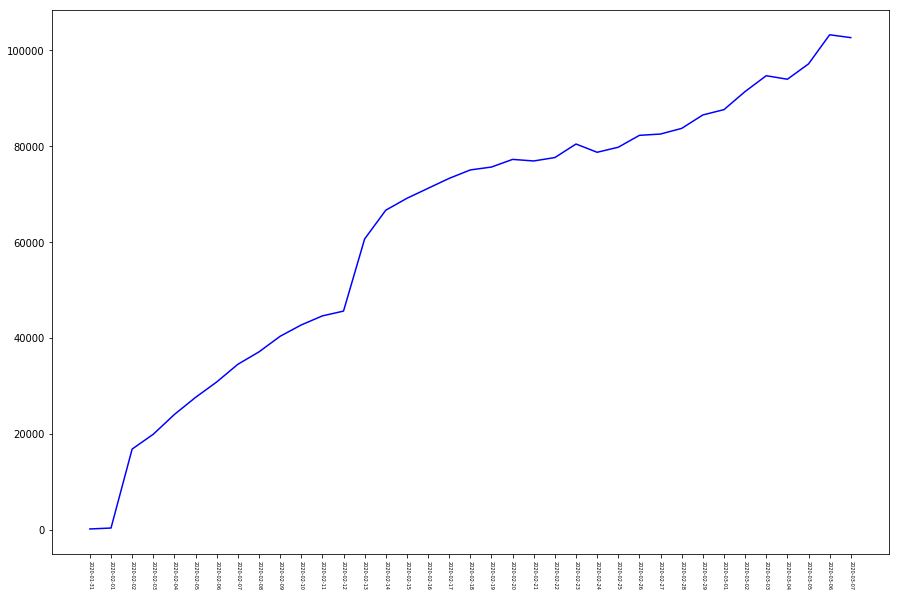

In [208]:
plt.figure(figsize=(15,10))
data_confirmed = data[["day","Confirmed"]].groupby("day").sum()
plt.xticks(rotation=270,fontsize=5)
plt.xlabel="Confirmed Cases"
plt.ylabel="Date"
plt.plot(data_confirmed, c="blue")

### Evolution of Deaths

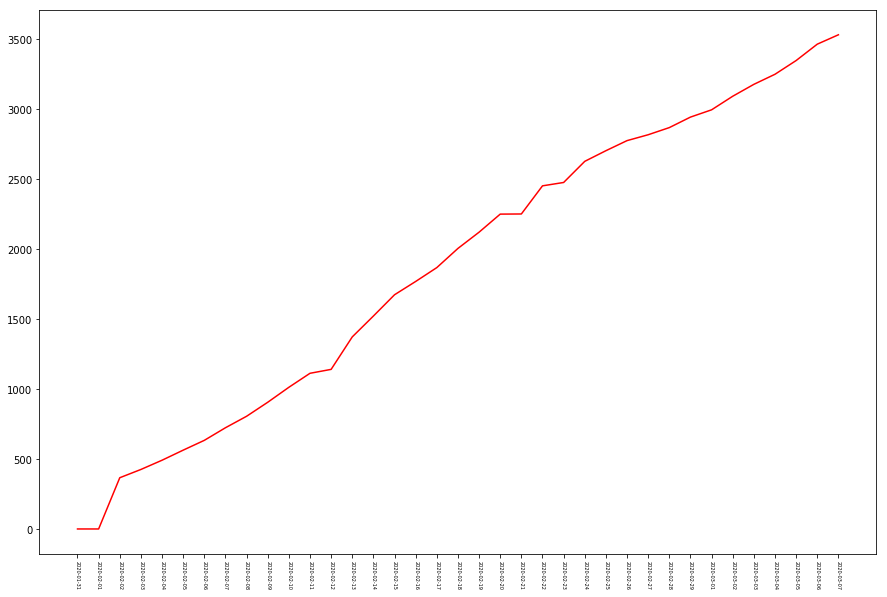

In [209]:
plt.figure(figsize=(15,10))
data_deaths = data[["day","Deaths"]].groupby("day").sum()
plt.xticks(rotation=270,fontsize=5)
plt.xlabel="Deaths"
plt.ylabel="Date"
plt.plot(data_deaths, c="red")

### Evolution of Recovered

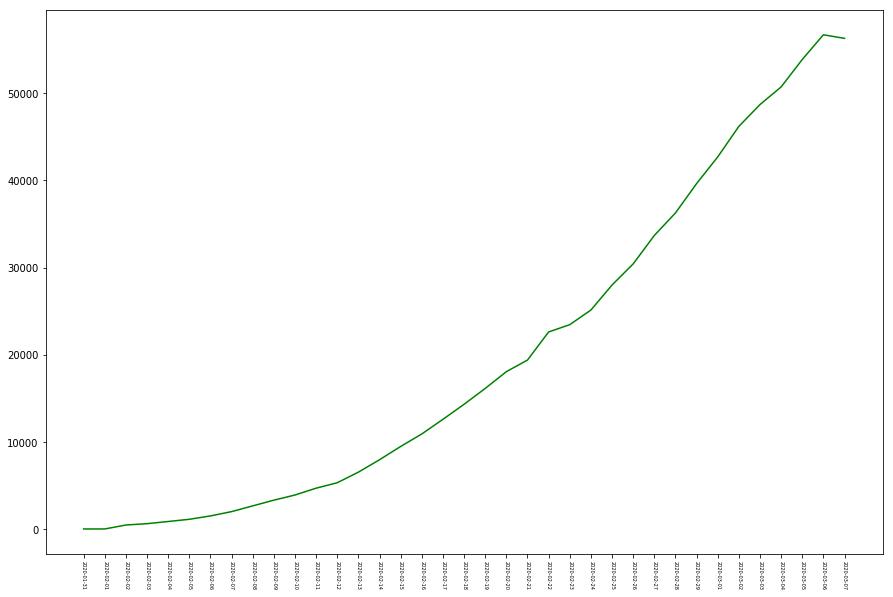

In [210]:
plt.figure(figsize=(15,10))
data_recovered = data[["day","Recovered"]].groupby("day").sum()
plt.xticks(rotation=270,fontsize=5)
plt.xlabel="Recovered Cases"
plt.ylabel="Date"
plt.plot(data_recovered, c="green")

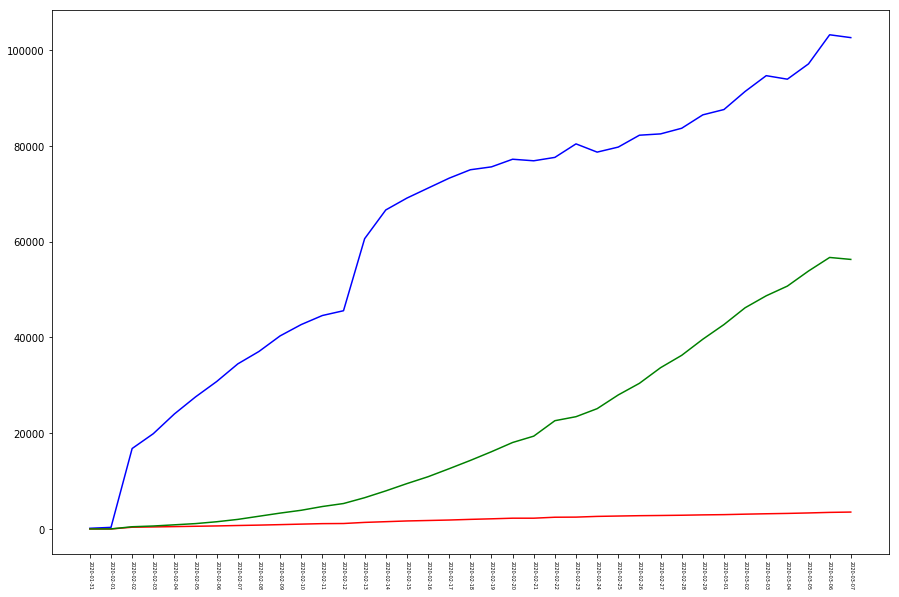

In [211]:
plt.figure(figsize=(15,10))
plt.xticks(rotation=270,fontsize=5)
plt.xlabel="Recovered Cases"
plt.ylabel="Date"
plt.plot(data_confirmed, c="blue")
plt.plot(data_deaths, c="red")
plt.plot(data_recovered, c="green")